In [8]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2618 - accuracy: 0.9233
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1093 - accuracy: 0.9663
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0729 - accuracy: 0.9775


In [9]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.0889 - accuracy: 0.9711
0.08894248306751251 0.9710999727249146


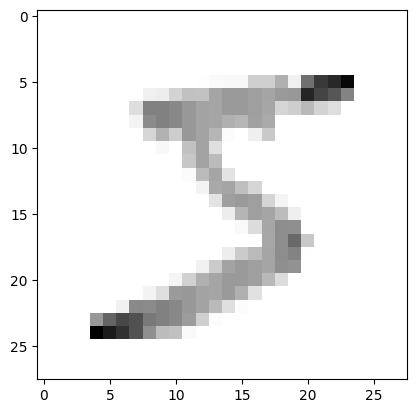

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [7]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print(x_train[0])

In [10]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [12]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [13]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 1s 3ms/step


In [14]:
print(predictions)

[[1.89739318e-08 1.64550261e-06 7.62490017e-05 ... 9.99856114e-01
  1.13376068e-07 1.12524292e-08]
 [7.75868814e-11 5.49361321e-05 9.99944925e-01 ... 2.30558461e-09
  7.93806887e-09 1.09306756e-14]
 [1.31113955e-08 9.99977112e-01 8.89091723e-07 ... 1.49787775e-05
  3.64524453e-06 4.09423535e-08]
 ...
 [4.42314843e-08 2.17512161e-06 3.81073335e-07 ... 1.65739148e-05
  5.70401971e-06 1.60559415e-04]
 [8.02749037e-06 2.17269153e-05 2.40282503e-07 ... 3.94823519e-06
  3.50414449e-03 7.26570448e-08]
 [6.79653809e-08 9.89587193e-07 1.18846010e-07 ... 1.16956667e-10
  2.98473566e-07 2.72568146e-09]]


In [25]:
import numpy as np

# alter number_in_array_to_predict to whatever number in the array you would like to try
number_in_array_to_predict= 4
# prints out best guess for what the handwritten number is
print(np.argmax(predictions[number_in_array_to_predict]))

4


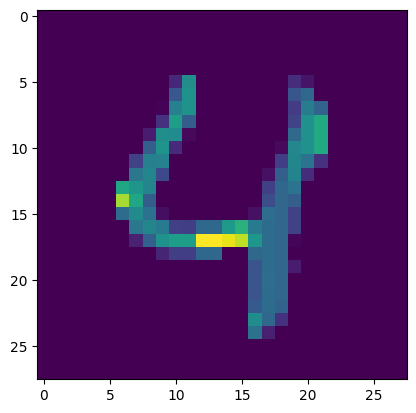

In [26]:
plt.imshow(x_test[number_in_array_to_predict])
# shows the number that was handwritten in the array
plt.show()